# Visualizing Stocks & Crypto: Which is a better investment based on 5 years of data? 

In [1]:
import requests 
import json
import os
from dotenv import load_dotenv
import pandas as pd
from pandas import json_normalize
import tweepy
import time
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Price Index Time Series Visualization


In [2]:
#We import the Crypto CSV and turn it into a DF, we also make sure it understands the date values as dates.
base_price_crypto = pd.read_csv('../data/base_price_crypto.csv')
base_price_crypto = pd.DataFrame(base_price_crypto)
base_price_crypto.date = pd.to_datetime(base_price_crypto.date)
base_price_crypto

,date,price_index_bit,price_index_ether
0,2016-04-11,1.000000,1.000000
1,2016-04-12,1.006407,0.861001
2,2016-04-13,1.002961,0.930659
3,2016-04-14,1.004258,0.970320
4,2016-04-15,1.017113,0.953607
...,...,...,...
1779,2021-02-23,115.565423,181.656875
1780,2021-02-24,117.650493,188.178526
1781,2021-02-25,111.469226,170.724149
1782,2021-02-26,109.684318,167.291617


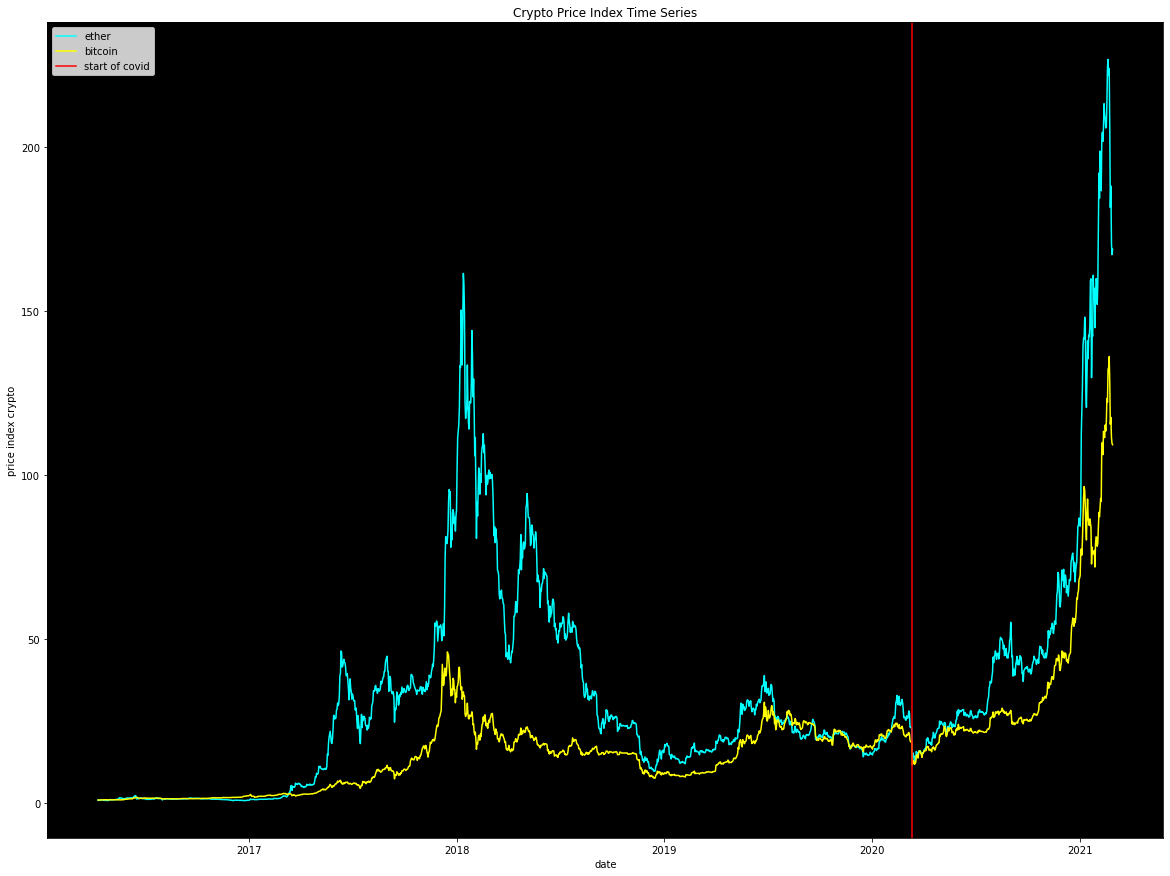

In [3]:
#Creating the Crypto Price Index Time Series
fig, ax = plt.subplots(figsize = (20, 15))
ax.set_facecolor('black')
sns.lineplot(data = base_price_crypto, x = 'date', y = 'price_index_ether', color = 'cyan', ax = ax, label ='ether')
sns.lineplot(data = base_price_crypto, x = 'date', y = 'price_index_bit', color = 'yellow', ax = ax, label = 'bitcoin')
ax.set_ylabel('price index crypto')
ax.set_title('Crypto Price Index Time Series')
ax.axvline(x='2020-03-11', color="r", label="start of covid")
plt.legend()
plt.savefig('../Graphs/crypto_price_index_time.jpg')
plt.show()

In [4]:
#We import the Crypto CSV and turn it into a DF, we also make sure it understands the date values as dates.
stocks_price = pd.read_csv('../data/stocks_price_index.csv')
stocks_price = pd.DataFrame(stocks_price)
stocks_price.date = pd.to_datetime(stocks_price.date)
stocks_price

,date,price_index_msft,price_index_aapl,price_index_gme,price_index_sp500
0,2016-04-11,1.000000,1.000000,1.000000,1.000000
1,2016-04-12,1.006260,1.013025,1.007028,1.009662
2,2016-04-13,1.019149,1.027701,1.053213,1.019799
3,2016-04-14,1.019333,1.028252,1.059237,1.019976
4,2016-04-15,1.024673,1.007595,1.063922,1.018972
...,...,...,...,...,...
1254,2021-04-05,4.586080,4.619336,6.256693,1.997027
1255,2021-04-06,4.563800,4.630710,6.174699,1.995083
1256,2021-04-07,4.601363,4.692717,5.956158,1.998026
1257,2021-04-08,4.663045,4.782976,5.698126,2.006459


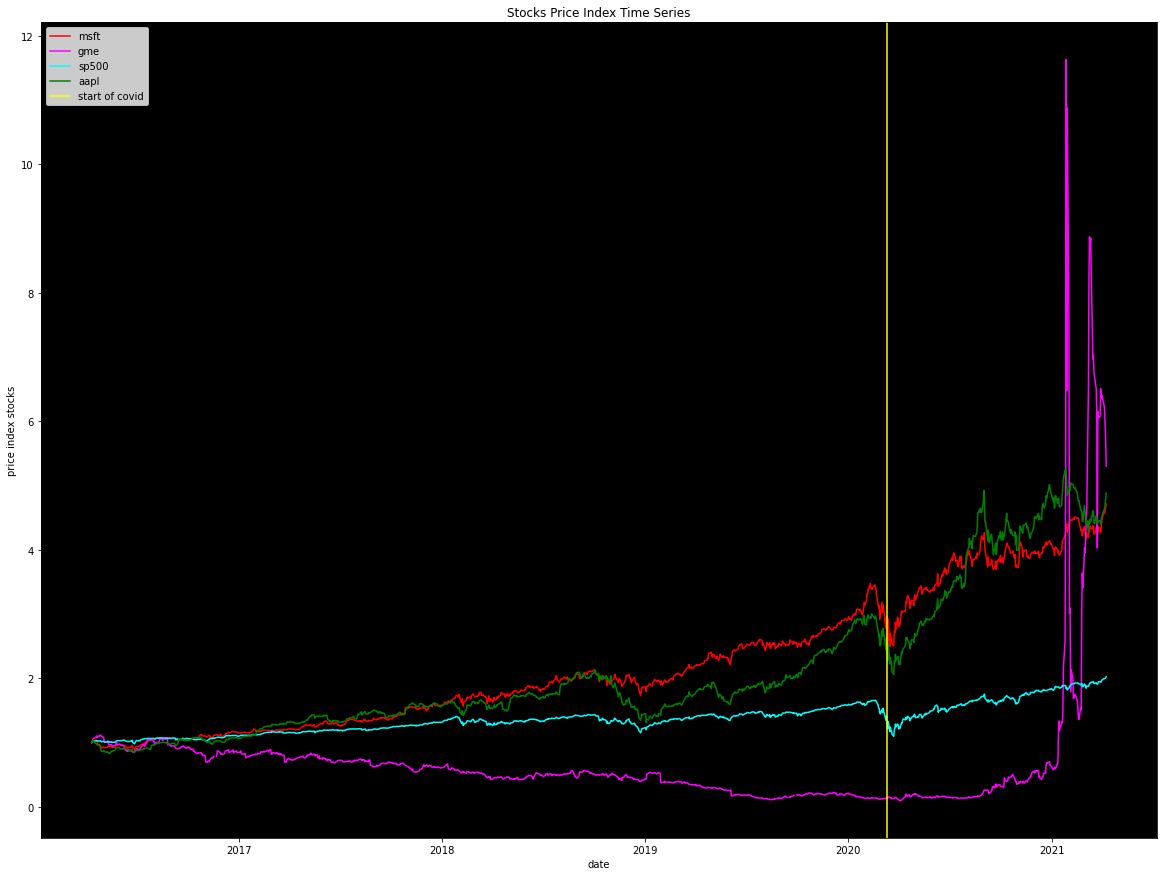

In [5]:
fig, ax = plt.subplots(figsize = (20, 15))
ax.set_facecolor('black')
ax.set_ylabel('price index stocks')
sns.lineplot(data = stocks_price, x = 'date', y = 'price_index_msft', color = 'red', ax = ax, label = 'msft')
sns.lineplot(data = stocks_price, x = 'date', y = 'price_index_gme', color = 'magenta', ax = ax, label = 'gme')
sns.lineplot(data = stocks_price, x = 'date', y = 'price_index_sp500', color = 'cyan', ax = ax, label = 'sp500')
sns.lineplot(data = stocks_price, x = 'date', y = 'price_index_aapl', color = 'green', ax = ax, label = 'aapl')
ax.axvline(x='2020-03-11', color="yellow", label="start of covid")
plt.legend()
ax.set_title('Stocks Price Index Time Series')
plt.savefig("../Graphs/Stock Price Index Over Time.jpg", dpi=550)

In [6]:
#We import our excess returns dataframe for stocks and crypto
excess1_returns= pd.read_csv('../data/excess_stock_returns.csv')
crypto_excess = pd.read_csv('../data/excess_crypto_returns.csv')


In [7]:
#We turn it into a dataframe and make sure our date column is in date time
excess1_returns = pd.DataFrame(excess1_returns)
excess1_returns.date = pd.to_datetime(excess1_returns.date)
crypto_excess = pd.DataFrame(crypto_excess)
crypto_excess.date = pd.to_datetime(crypto_excess.date)

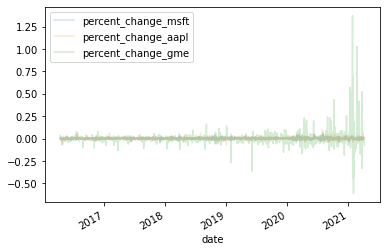

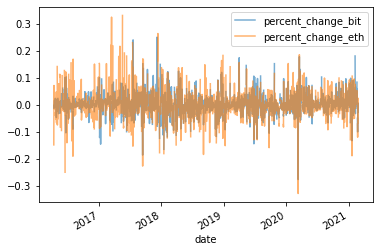

In [54]:
#Here we visualize the excess returns compared to the S&P500 of both crypto and stocks
excess1_returns.plot(x = 'date', alpha = 0.2)

plt.savefig("../Graphs/Excess Returns Stocks.jpg", dpi=550)

crypto_excess.plot( x = 'date', alpha = 0.6)
plt.savefig("../Graphs/Excess Returns Crypto.jpg", dpi=550)

<ipython-input-38-b539bd9f7a93>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg_crypto_excess = crypto_excess.mean()


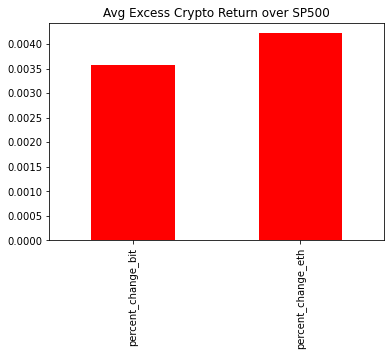

In [38]:
#Calculating the Sharpe Ratio 
#Step 1 Average Excess Return 
avg_crypto_excess = crypto_excess.mean()
avg_crypto_excess.plot.bar(title = 'Avg Excess Crypto Return over SP500', color = 'red')
plt.savefig("../Graphs/AVG Excess Returns Crypto.jpg", dpi=550)

<ipython-input-24-6faab291dc8e>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg_excess_returns = excess1_returns.mean()


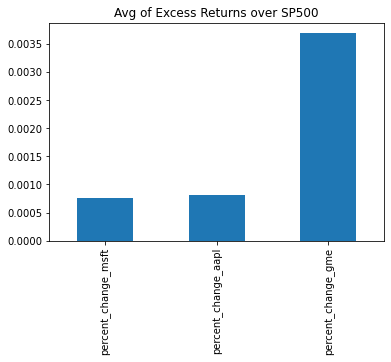

In [24]:
avg_excess_returns = excess1_returns.mean()
avg_excess_returns.plot.bar(title = 'Avg of Excess Returns over SP500')
plt.savefig("../Graphs/AVG Excess Returns Stocks.jpg", dpi=550)

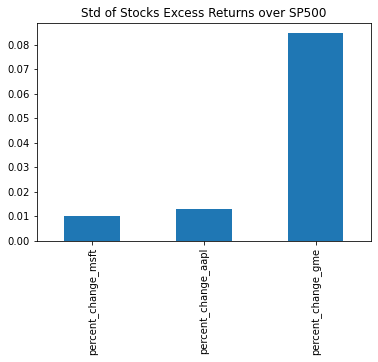

In [31]:
#Calculating Sharpe Ratio
#Step 2: Calculating Standard Deviation of Excess Returns
std_excess = excess1_returns.std()
std_excess.plot.bar(title = 'Std of Stocks Excess Returns over SP500')
#we can see that apple has a higher degree of volatility than microsoft. 
plt.savefig("../Graphs/Risk Excess Returns Stock.jpg", dpi=550)

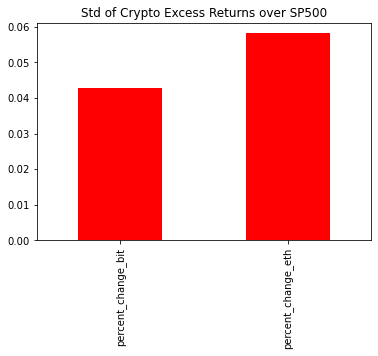

In [37]:
crypto_std_excess = crypto_excess.std()
crypto_std_excess.plot.bar(title = 'Std of Crypto Excess Returns over SP500', color = 'red')
plt.savefig("../Graphs/Risk Excess Returns Crypto.jpg", dpi=550)

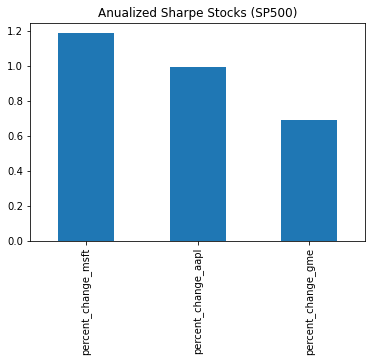

In [29]:
#Sharpe Ratio - Calculating Daily & Anualized Sharpe Ratio (Ratio of avg excess returs / sd excess returns)
daily_sharpe_ratio = avg_excess_returns.div(std_excess)
daily_sharpe_ratio.plot.bar(title = 'Daily Sharpe Ratio Stocks (SP500)')
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
annual_sharpe_ratio.plot.bar(title = 'Anualized Sharpe Stocks (SP500)')
plt.savefig("../Graphs/Anualized Sharpe Ratio Stocks.jpg", dpi=550)

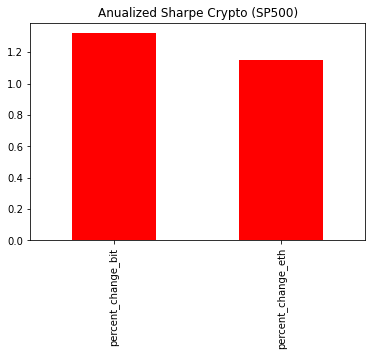

In [33]:
#Sharpe Ratio - Calculating Daily & Anualized Sharpe Ratio for Crypto (Ratio of avg excess returs / sd excess returns)
daily_sharpe_ratio_cr = avg_crypto_excess.div(crypto_std_excess)
daily_sharpe_ratio_cr.plot.bar(title = 'Daily Sharpe Ratio Crypto')
annual_factor = np.sqrt(252)
annual_sharpe_ratio_cr = daily_sharpe_ratio_cr.mul(annual_factor)
annual_sharpe_ratio_cr.plot.bar(title = 'Anualized Sharpe Crypto (SP500)', color = 'red')
plt.savefig("../Graphs/Anualized Sharpe Ratio Crypto.jpg", dpi=550)

In [34]:
annual_sharpe_ratio_cr

percent_change_bit    1.32007
percent_change_eth    1.15128
dtype: float64

In [35]:
annual_sharpe_ratio


percent_change_msft    1.186431
percent_change_aapl    0.994350
percent_change_gme     0.692463
dtype: float64

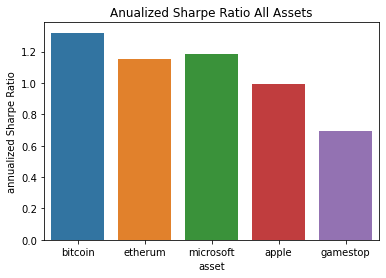

In [36]:
# We join all the data on annual sharpe ratios together into a nice graph. 
total_sharpe = {'asset' : ['bitcoin', 'etherum', 'microsoft', 'apple', 'gamestop'],
'annualized Sharpe Ratio' : [1.320, 1.151, 1.186, .994, .692] }
total_sharpes = pd.DataFrame(total_sharpe, columns = ['asset', 'annualized Sharpe Ratio'])
sns.barplot(data = total_sharpes, x= 'asset', y= 'annualized Sharpe Ratio')
plt.title('Anualized Sharpe Ratio All Assets')
plt.savefig("../Graphs/Annualized Sharpe Ratio All Assets.jpg", dpi=550)

In [49]:
return_crypto = pd.read_csv('../data/crypto_return.csv')
return_crypto

,date,percent_change_bit,percent_change_eth
0,2016-04-11,0.002180,-0.032737
1,2016-04-12,0.006407,-0.138999
2,2016-04-13,-0.003424,0.080904
3,2016-04-14,0.001293,0.042616
4,2016-04-15,0.012800,-0.017224
...,...,...,...
1779,2021-02-23,-0.099302,-0.118850
1780,2021-02-24,0.018042,0.035901
1781,2021-02-25,-0.052539,-0.092754
1782,2021-02-26,-0.016013,-0.020106


In [46]:
crypto_corr = base_price_crypto.corr()
base_price_crypto.corr()

,price_index_bit,price_index_ether
price_index_bit,1.000000,0.849878
price_index_ether,0.849878,1.000000


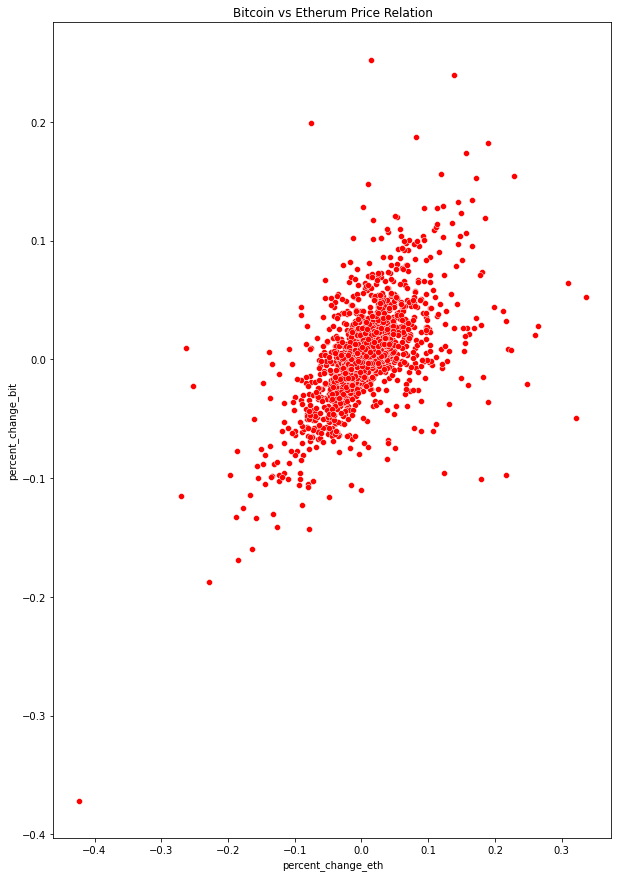

In [51]:
#We Create a plot to show the correlation between our chosen crypto assets
fig, ax = plt.subplots(figsize = (10, 15))
sns.scatterplot(x = 'percent_change_eth', y = 'percent_change_bit', data = return_crypto, color = 'red' )
plt.title('Bitcoin vs Etherum Price Relation')
plt.savefig('../Graphs/Bitcoin vs Etherum Excess Returns.jpg')

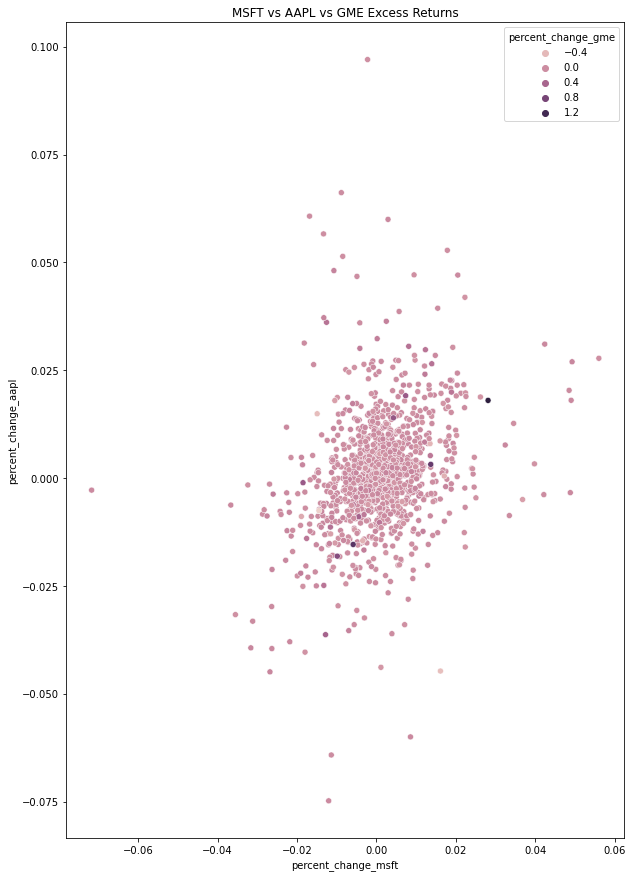

In [53]:
fig, ax = plt.subplots(figsize = (10, 15))
sns.scatterplot(x = 'percent_change_msft', y = 'percent_change_aapl', data = excess1_returns, hue = 'percent_change_gme' )
plt.title('MSFT vs AAPL vs GME Excess Returns')
plt.savefig('../Graphs/GME vs MSFT vs Apple Excess Returns.jpg')